<a href="https://www.kaggle.com/code/abdallhwerby/eda-preprocessing-and-classification?scriptVersionId=106446103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bank loan status 

## Summary:
### We are analyzing the bank's data:

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv (r'../input/my-dataset/credit_train.csv') 

In [3]:
plt.rcParams['axes.facecolor'] = 'Beige'

# Exploratory Data Analysis (EDA)

## Take a quick look at the data:

In [4]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [5]:
data.shape

(100514, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

### Data types: float64 (12 columns), object (7 columns)


In [7]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [8]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


## Visualizing Data


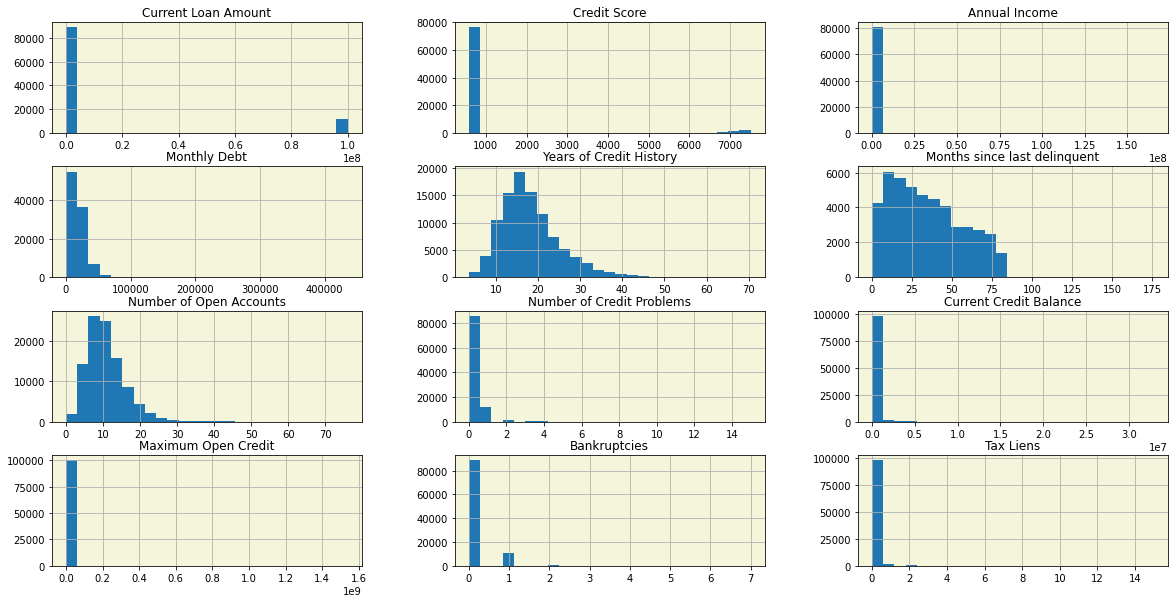

In [9]:
data.hist(bins=25,figsize=(20,10));

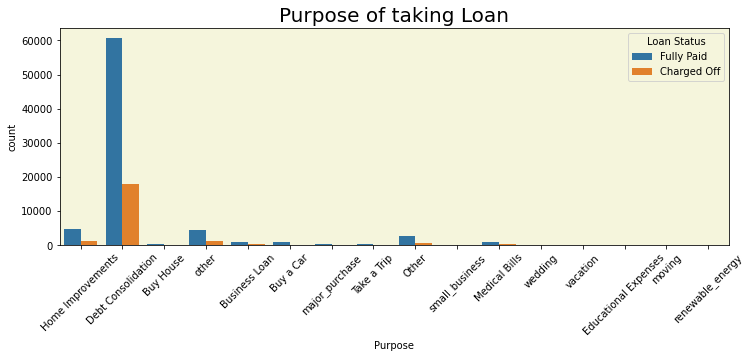

In [10]:
plt.figure(figsize=(12,4))
sns.countplot(x='Purpose',data=data,hue='Loan Status')
plt.xticks(rotation=45)
plt.title('Purpose of taking Loan',fontdict={'fontsize':20})
plt.show()

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

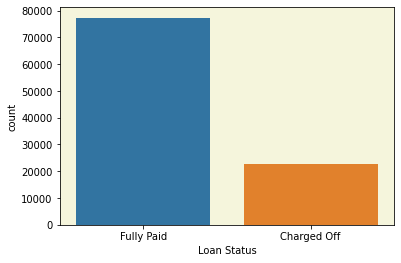

In [11]:
sns.countplot(x='Loan Status', data = data)

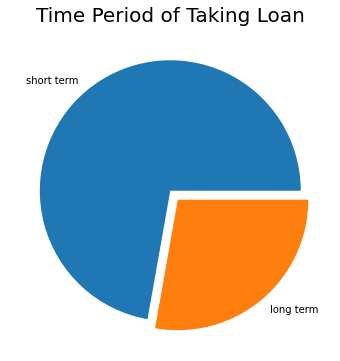

In [12]:
plt.figure(figsize=(6,6))
plt.pie(x=data['Term'].value_counts(),labels=['short term','long term'],explode=[0,0.09])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':20})
plt.show()


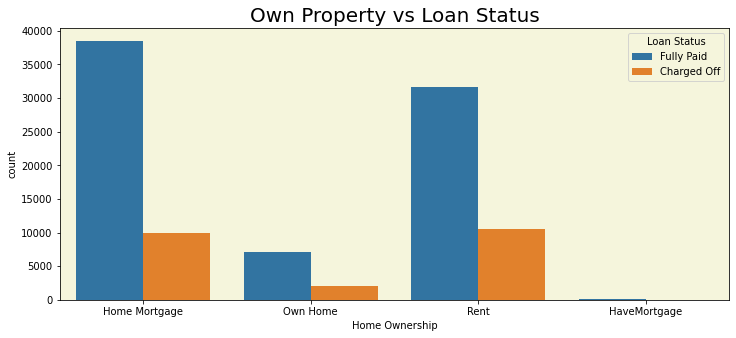

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='Home Ownership',data=data,hue='Loan Status')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.show()


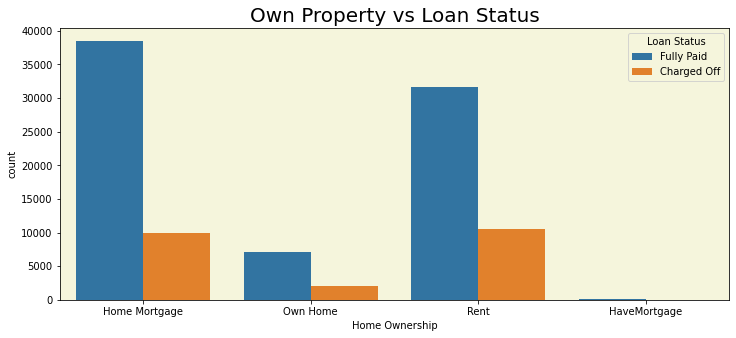

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='Home Ownership',data=data,hue='Loan Status')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.show()


## EDA visual foundings:

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

## Understanding our data:
### We use correlation matrix 

In [16]:
corr_matrix=data.corr()
corr_matrix

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


### But Plotting a correlation plot is actually clearer 

<AxesSubplot:>

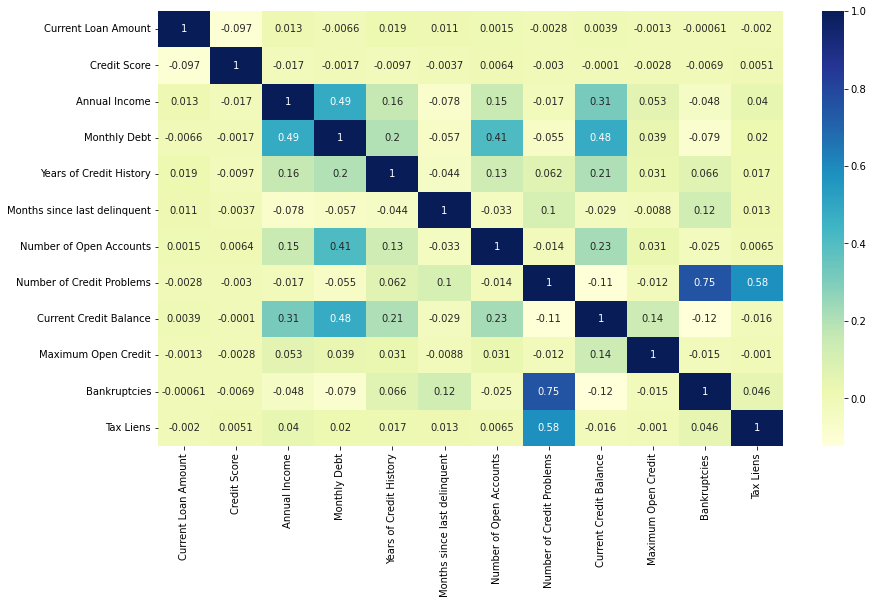

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

### To understand the correlation plot: it creates a relation between 2 variables and checks if it's proportional(higher than 0.5) or inversely proportional (less than -0.5) , or no relation (close to zero)
#### Understanding the correlation between columns helps you make a better model as the insertion of lesser important columns will actually cause bias or corrupt the model.
### We found this:
- Bankruptcy has a high correlation with number of credit problems as the bankrupt bank account is probably immeditely frozen after a bankruptcy.
- Tax liens also have a high correlation with number of credit problems.
- Monthly debt has a high correlation with both, current credit balance, annual income and number of open accounts.


### We drop ID columns as they are features for identification:

In [18]:
data.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)


## Missing data:
### Is there missing data?

In [19]:
print(data.isnull().values.any())

True


<AxesSubplot:>

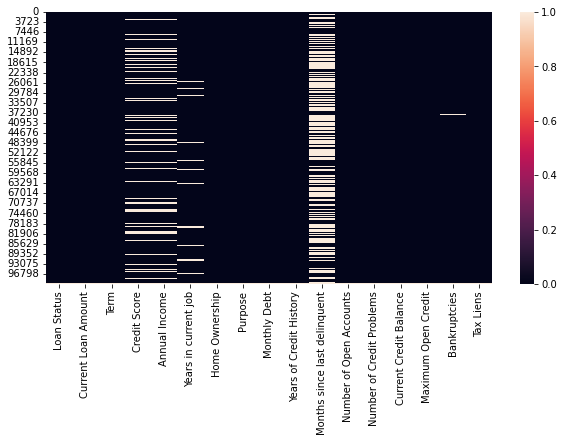

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap( data.isnull())

In [21]:
# Check the percentage of Nan in dataset
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data['Loan Status'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Months since last delinquent,53655,0.53655
Credit Score,19668,0.19668
Annual Income,19668,0.19668
Years in current job,4736,0.04736
Bankruptcies,718,0.00718
Tax Liens,524,0.00524
Maximum Open Credit,516,0.00516
Current Credit Balance,514,0.00514
Number of Credit Problems,514,0.00514
Number of Open Accounts,514,0.00514


### We have:
- 51% missing data in total Months since last deliquent.
- 19% in both credit score and annual income.

### Drop the columns with > 50% missing


In [22]:
data.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

### But if there's some rows with alot of missing values, we should remove all rows with more than 2 missing values as filling more than 2 rows could corrupt the data, we use threshold = 8.

In [23]:
print(data.dropna(axis=0,thresh=8).tail())

      Loan Status  Current Loan Amount        Term  Credit Score  \
99995  Fully Paid             147070.0  Short Term         725.0   
99996  Fully Paid           99999999.0  Short Term         732.0   
99997  Fully Paid             103136.0  Short Term         742.0   
99998  Fully Paid             530332.0  Short Term         746.0   
99999  Fully Paid           99999999.0  Short Term         743.0   

       Annual Income Years in current job Home Ownership             Purpose  \
99995       475437.0              7 years       Own Home               other   
99996      1289416.0               1 year           Rent  Debt Consolidation   
99997      1150545.0              6 years           Rent  Debt Consolidation   
99998      1717524.0              9 years           Rent  Debt Consolidation   
99999       935180.0                  NaN       Own Home  Debt Consolidation   

       Monthly Debt  Years of Credit History  Number of Open Accounts  \
99995       2202.86                  

### Drop last 514 rows as they are all NaN

In [24]:
data.drop(data.tail(514).index, inplace=True) 

### Check the missing values in data once again:

In [25]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data['Loan Status'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit Score,19154,0.19154
Annual Income,19154,0.19154
Years in current job,4222,0.04222
Bankruptcies,204,0.00204
Tax Liens,10,0.00010
Maximum Open Credit,2,0.00002
Loan Status,0,0.00000
Current Loan Amount,0,0.00000
Term,0,0.00000
Home Ownership,0,0.00000


## filling missing data:
### We should check that all values are numerical.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  object 
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  object 
 3   Credit Score               80846 non-null   float64
 4   Annual Income              80846 non-null   float64
 5   Years in current job       95778 non-null   object 
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        999

## Encoding categorical columns:

In [27]:
le = LabelEncoder()
data['Term']=le.fit_transform(data['Term'])
data['Years in current job']=le.fit_transform(data['Years in current job'])
data['Home Ownership']=le.fit_transform(data['Home Ownership'])
data['Purpose']=le.fit_transform(data['Purpose'])
data['Loan Status']=le.fit_transform(data['Loan Status'])

## Before completing the missing values, we check the distribution to decide the better representation of central tendency:

<AxesSubplot:xlabel='Credit Score', ylabel='Count'>

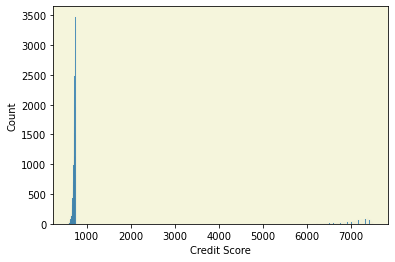

In [28]:
sns.histplot(x= 'Credit Score',data =data)

### It's better to use median.

<AxesSubplot:xlabel='Annual Income', ylabel='Count'>

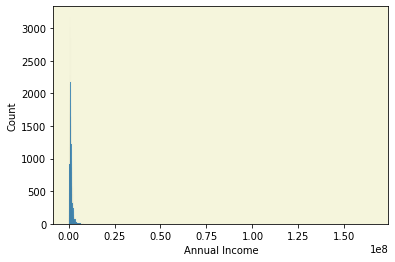

In [29]:
sns.histplot(x= 'Annual Income',data =data)

### It's better to use median.

<AxesSubplot:xlabel='Years in current job', ylabel='Count'>

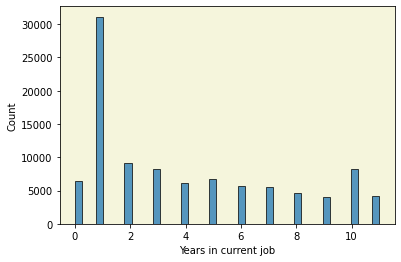

In [30]:
sns.histplot(x= 'Years in current job',data =data)

### It's better to use mean.

<AxesSubplot:xlabel='Bankruptcies', ylabel='Count'>

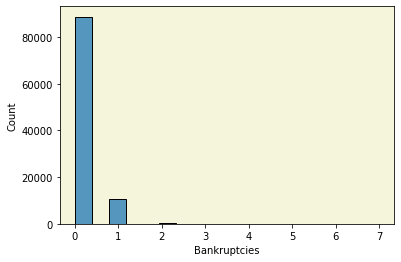

In [31]:
sns.histplot(x= 'Bankruptcies',data =data)

### It's better to use median.

<AxesSubplot:xlabel='Tax Liens', ylabel='Count'>

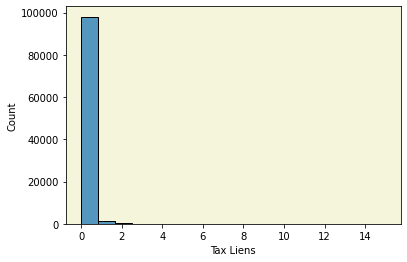

In [32]:
sns.histplot(x= 'Tax Liens',data =data)

### It's better to use mode.

####  For some columns it's better to use mean, other median and other mode.

In [33]:
imputerl = SimpleImputer(strategy='median', missing_values=np.nan)
imputerl = imputerl.fit(data[['Credit Score']])
data['Credit Score'] = imputerl.transform(data[['Credit Score']])
imputer2 = SimpleImputer(strategy='median', missing_values=np.nan)
imputer2 = imputer2.fit(data[['Maximum Open Credit']])
data['Maximum Open Credit'] = imputer2.transform(data[['Maximum Open Credit']])
imputer3 = SimpleImputer(strategy='median', missing_values=np.nan)
imputer3 = imputer3.fit(data[['Annual Income']])
data['Annual Income'] = imputer3.transform(data[['Annual Income']])
imputer4 = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer4 = imputer4.fit(data[['Tax Liens']])
data['Tax Liens'] = imputer4.transform(data[['Tax Liens']])
imputer5 = SimpleImputer(strategy='median', missing_values=np.nan)
imputer5 = imputer5.fit(data[['Bankruptcies']])
data['Bankruptcies'] = imputer5.transform(data[['Bankruptcies']])
imputer6 = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer6 = imputer6.fit(data[['Years in current job']])
data['Years in current job'] = imputer5.transform(data[['Years in current job']])

In [34]:
data.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,1,147070.0,1,725.0,475437.0,7.0,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1,99999999.0,1,732.0,1289416.0,0.0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,1,103136.0,1,742.0,1150545.0,6.0,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,1,530332.0,1,746.0,1717524.0,9.0,3,3,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,1,99999999.0,1,743.0,935180.0,11.0,2,3,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  int64  
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  int64  
 3   Credit Score               100000 non-null  float64
 4   Annual Income              100000 non-null  float64
 5   Years in current job       100000 non-null  float64
 6   Home Ownership             100000 non-null  int64  
 7   Purpose                    100000 non-null  int64  
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        100

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

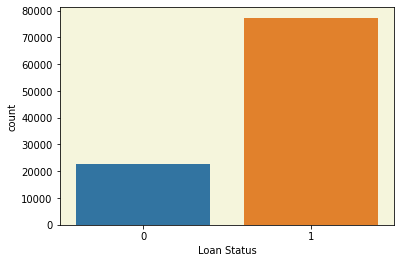

In [36]:
sns.countplot('Loan Status', data = data)

# Outliers:
## We are going to use two methods to deal with oultiers:
## 1) Deletion by scatterplot identification.
## 2) Standardization.

### ______________________________________________

### To look for ouliers we use boxplot 

[Text(0, 0, 'Loan Status'),
 Text(1, 0, 'Current Loan Amount'),
 Text(2, 0, 'Term'),
 Text(3, 0, 'Credit Score'),
 Text(4, 0, 'Annual Income'),
 Text(5, 0, 'Years in current job'),
 Text(6, 0, 'Home Ownership'),
 Text(7, 0, 'Purpose'),
 Text(8, 0, 'Monthly Debt'),
 Text(9, 0, 'Years of Credit History'),
 Text(10, 0, 'Number of Open Accounts'),
 Text(11, 0, 'Number of Credit Problems'),
 Text(12, 0, 'Current Credit Balance'),
 Text(13, 0, 'Maximum Open Credit'),
 Text(14, 0, 'Bankruptcies'),
 Text(15, 0, 'Tax Liens')]

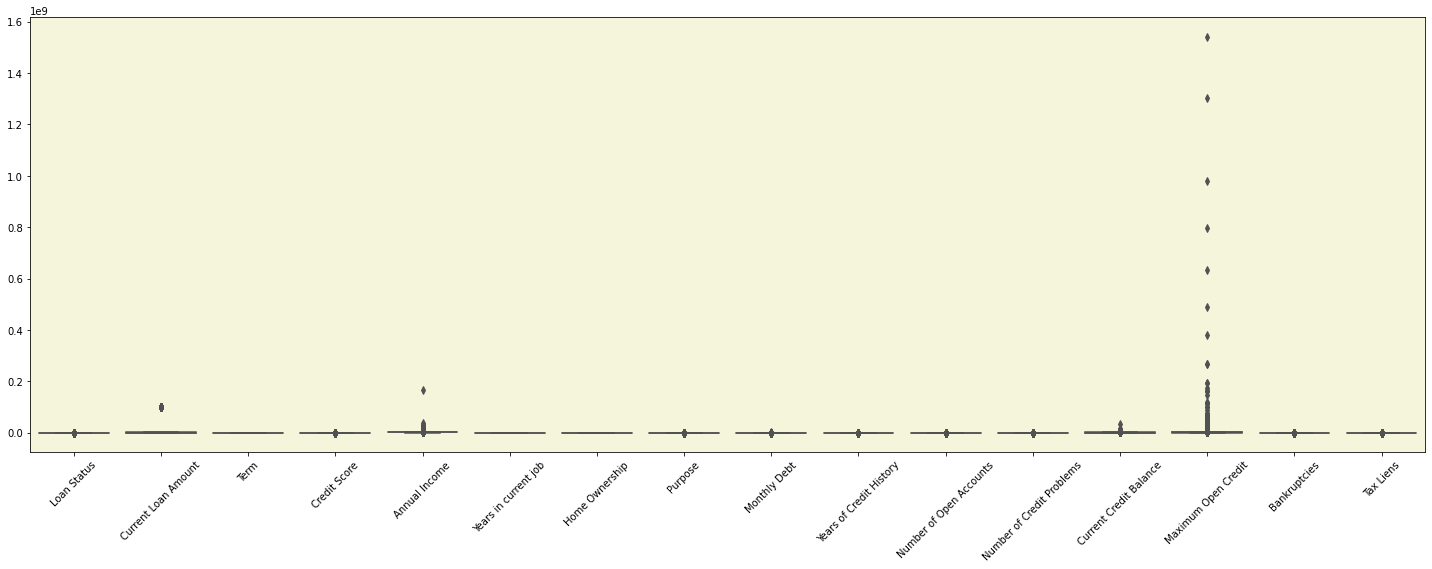

In [37]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

### A more accurate representation for ouliers is using a scatter plot
#### We make a scatter plot matrix:

### We make the scatterplot for the numerical columns only:

<Figure size 1440x1440 with 0 Axes>

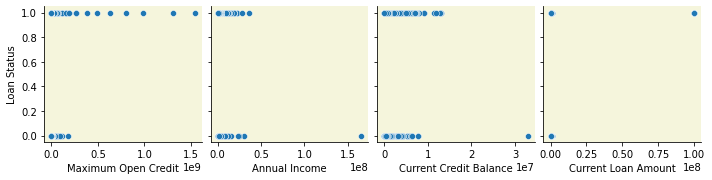

In [38]:
plt.figure(figsize = (20,20))
sns.pairplot(data = data , x_vars = ['Maximum Open Credit', 'Annual Income', 'Current Credit Balance','Current Loan Amount'] , y_vars = ['Loan Status'])

### We can't find outliers by scatter plot also, so we use Interquartile method:

In [39]:
# IQR
Q1 = np.percentile(data['Annual Income'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Annual Income'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['Annual Income'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['Annual Income'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (100000, 16)
New Shape:  (93087, 16)


In [40]:
data.describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,93087.000000,9.308700e+04,93087.000000,93087.000000,9.308700e+04,93087.000000,93087.000000,93087.000000,93087.000000,93087.000000,93087.000000,93087.000000,9.308700e+04,9.308700e+04,93087.000000,93087.000000
mean,0.768217,1.150047e+07,0.727610,1010.291083,1.182434e+06,4.091334,1.962540,3.804495,17241.864679,17.968394,11.001901,0.169755,2.693518e+05,6.814407e+05,0.120898,0.026738
std,0.421974,3.148527e+07,0.445192,1336.655337,4.230394e+05,3.449697,0.954582,2.275738,10307.032369,6.940348,4.945415,0.477830,2.781649e+05,6.824032e+06,0.354943,0.242863
min,0.000000,1.080200e+04,0.000000,585.000000,7.662700e+04,0.000000,0.000000,0.000000,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,1.766380e+05,0.000000,711.000000,8.989375e+05,1.000000,1.000000,3.000000,9870.690000,13.200000,8.000000,0.000000,1.096490e+05,2.662000e+05,0.000000,0.000000
50%,1.000000,2.926660e+05,1.000000,724.000000,1.174162e+06,3.000000,2.000000,3.000000,15583.990000,16.700000,10.000000,0.000000,2.015710e+05,4.506920e+05,0.000000,0.000000
75%,1.000000,4.813050e+05,1.000000,737.000000,1.390306e+06,7.000000,3.000000,3.000000,22763.805000,21.400000,14.000000,0.000000,3.472725e+05,7.439520e+05,0.000000,0.000000
max,1.000000,1.000000e+08,1.000000,7510.000000,2.384975e+06,11.000000,3.000000,15.000000,152512.240000,70.500000,76.000000,15.000000,7.666747e+06,1.304726e+09,7.000000,15.000000


In [41]:
data = data.drop(data[data['Maximum Open Credit']>7.1**8].index)

[Text(0, 0, 'Loan Status'),
 Text(1, 0, 'Current Loan Amount'),
 Text(2, 0, 'Term'),
 Text(3, 0, 'Credit Score'),
 Text(4, 0, 'Annual Income'),
 Text(5, 0, 'Years in current job'),
 Text(6, 0, 'Home Ownership'),
 Text(7, 0, 'Purpose'),
 Text(8, 0, 'Monthly Debt'),
 Text(9, 0, 'Years of Credit History'),
 Text(10, 0, 'Number of Open Accounts'),
 Text(11, 0, 'Number of Credit Problems'),
 Text(12, 0, 'Current Credit Balance'),
 Text(13, 0, 'Maximum Open Credit'),
 Text(14, 0, 'Bankruptcies'),
 Text(15, 0, 'Tax Liens')]

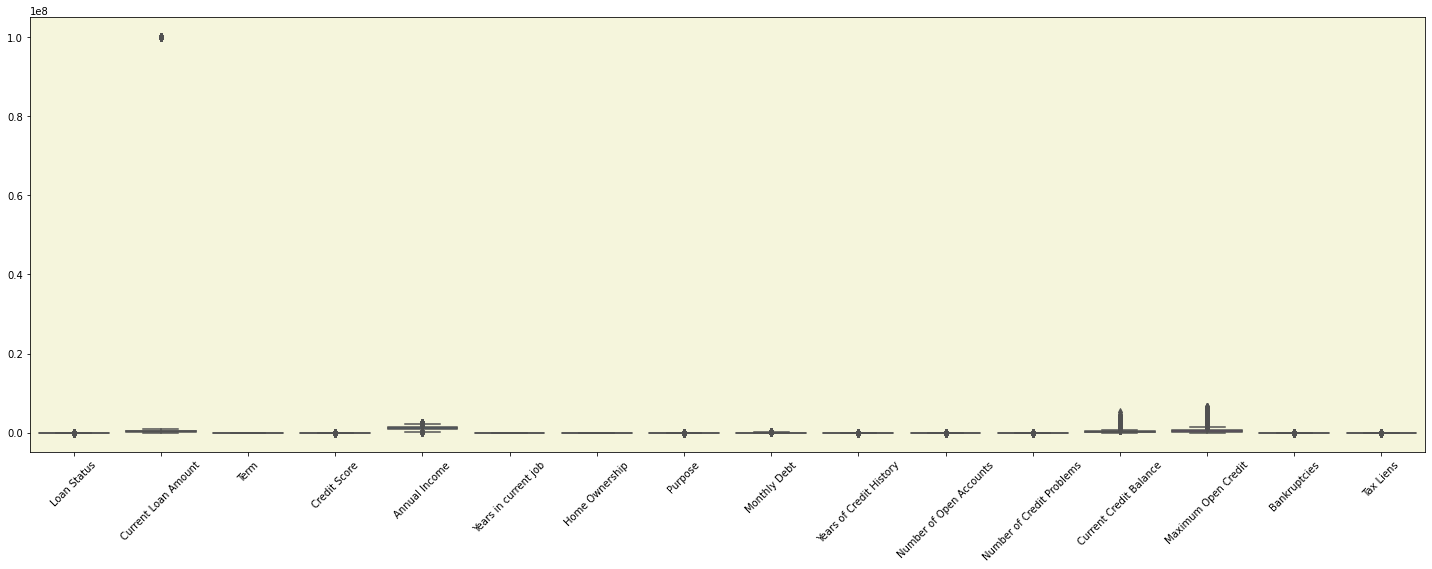

In [42]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

## 1) Deletion of outliers:

####  We only deleted the outliers that could actually corrupt data:

### Check the present of outliers again:

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

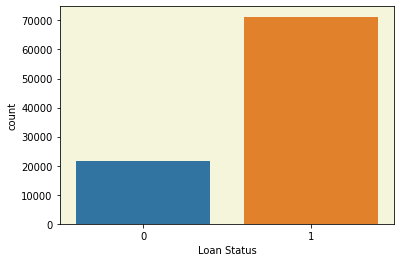

In [43]:
sns.countplot(x='Loan Status',data=data)

[Text(0, 0, 'Loan Status'),
 Text(1, 0, 'Current Loan Amount'),
 Text(2, 0, 'Term'),
 Text(3, 0, 'Credit Score'),
 Text(4, 0, 'Annual Income'),
 Text(5, 0, 'Years in current job'),
 Text(6, 0, 'Home Ownership'),
 Text(7, 0, 'Purpose'),
 Text(8, 0, 'Monthly Debt'),
 Text(9, 0, 'Years of Credit History'),
 Text(10, 0, 'Number of Open Accounts'),
 Text(11, 0, 'Number of Credit Problems'),
 Text(12, 0, 'Current Credit Balance'),
 Text(13, 0, 'Maximum Open Credit'),
 Text(14, 0, 'Bankruptcies'),
 Text(15, 0, 'Tax Liens')]

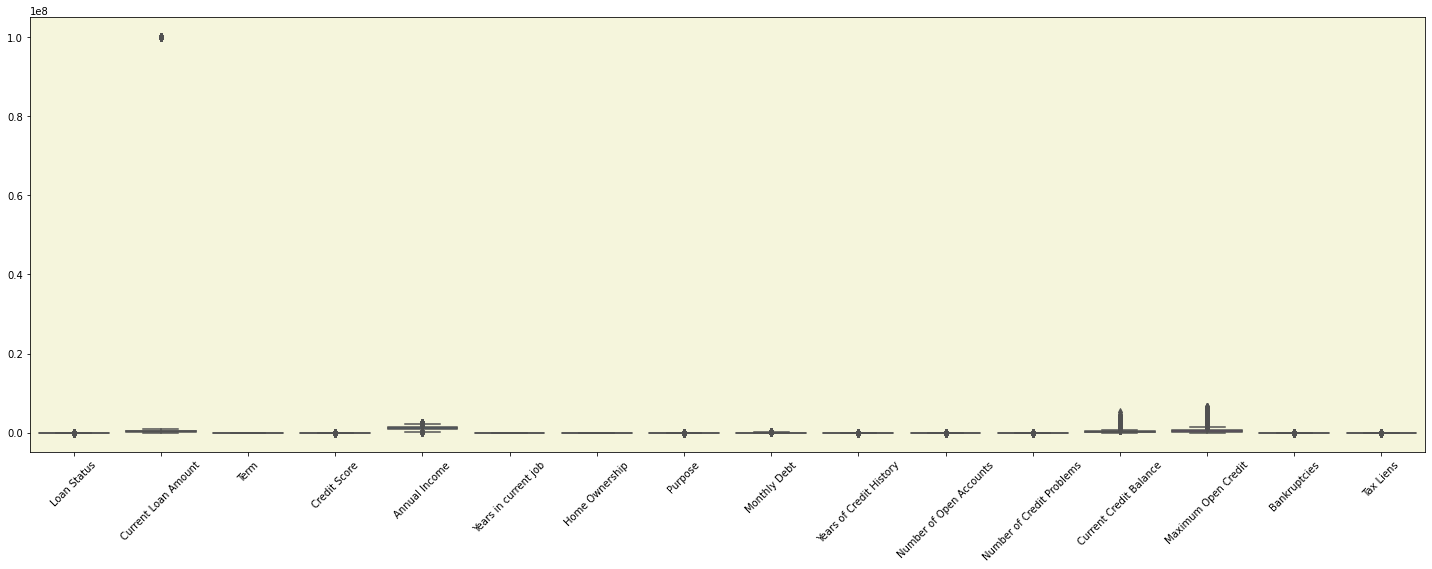

In [44]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

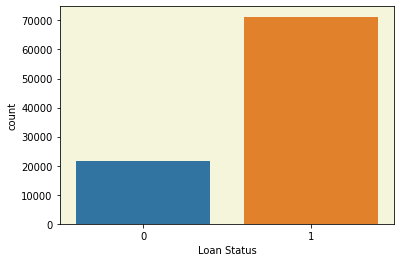

In [45]:
sns.countplot(x='Loan Status',data=data)

#### Outliers are nowhere to be found

## VIF:

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) 
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

Loan Status                   4.802465
Current Loan Amount           1.180856
Term                          3.675121
Credit Score                  1.739506
Annual Income                10.181086
Years in current job          2.321346
Home Ownership                4.455917
Purpose                       3.539987
Monthly Debt                  6.957563
Years of Credit History       7.385807
Number of Open Accounts       7.435102
Number of Credit Problems     8.069631
Current Credit Balance        6.194095
Maximum Open Credit           6.130317
Bankruptcies                  5.512520
Tax Liens                     2.984734
dtype: float64

## Treatment of multicolinearity:

In [47]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [48]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

Annual Income has been removed
Number of Credit Problems has been removed
Number of Open Accounts has been removed
Years of Credit History has been removed
Current Credit Balance has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,8.0,1,5,5214.74,416746.0,1.0,0.0
1,1,262328.0,1,724.0,1.0,1,3,33295.98,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,8.0,2,3,29200.53,750090.0,0.0,0.0
3,1,347666.0,0,721.0,3.0,2,3,8741.90,386958.0,0.0,0.0
4,1,176220.0,1,724.0,5.0,3,3,20639.70,427174.0,0.0,0.0


### calculating VIF for remaining columns

In [49]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(Loan Status             4.236018
 Current Loan Amount     1.180277
 Term                    3.562582
 Credit Score            1.656837
 Years in current job    2.279806
 Home Ownership          4.251398
 Purpose                 3.343688
 Monthly Debt            3.716726
 Maximum Open Credit     2.599917
 Bankruptcies            1.125139
 Tax Liens               1.014959
 dtype: float64,
 11)

# Splitting data:

In [50]:
reg = linear_model.LinearRegression()

### Rearragning columns:


In [51]:
data = data[['Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History','Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan Status']]
data

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,445412.0,1,709.0,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,262328.0,1,724.0,1174162.0,1.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,1
2,99999999.0,1,741.0,2231892.0,8.0,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,1
3,347666.0,0,721.0,806949.0,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,176220.0,1,724.0,1174162.0,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,1,725.0,475437.0,7.0,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0,1
99996,99999999.0,1,732.0,1289416.0,0.0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,1
99997,103136.0,1,742.0,1150545.0,6.0,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,1
99998,530332.0,1,746.0,1717524.0,9.0,3,3,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,1


### To create the proper comparison we drop house value column from x and make it y


In [52]:
x = data.drop(['Loan Status'] , axis = 1).values
y = data['Loan Status' ].values


In [53]:
y.sum()

71272

In [54]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)


In [55]:
x_train.shape

(74251, 15)

In [56]:
y_train.shape

(74251,)

## Balancing data

### 1) SMOT

In [57]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

# Scaling
### Make sure all data aren't categorical

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92814 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Current Loan Amount        92814 non-null  float64
 1   Term                       92814 non-null  int64  
 2   Credit Score               92814 non-null  float64
 3   Annual Income              92814 non-null  float64
 4   Years in current job       92814 non-null  float64
 5   Home Ownership             92814 non-null  int64  
 6   Purpose                    92814 non-null  int64  
 7   Monthly Debt               92814 non-null  float64
 8   Years of Credit History    92814 non-null  float64
 9   Number of Open Accounts    92814 non-null  float64
 10  Number of Credit Problems  92814 non-null  float64
 11  Current Credit Balance     92814 non-null  float64
 12  Maximum Open Credit        92814 non-null  float64
 13  Bankruptcies               92814 non-null  flo

In [60]:
from sklearn.preprocessing import RobustScaler

#### Robust scaler reduces the effect of ouliers


In [61]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [62]:
x_train

array([[ 1.37262701e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -1.86129692e-01,  1.00000000e+00,  0.00000000e+00],
       [-5.18025673e-01,  0.00000000e+00,  4.61538462e-01, ...,
        -8.72212932e-01,  0.00000000e+00,  0.00000000e+00],
       [ 4.53805822e-01, -1.00000000e+00, -3.46153846e-01, ...,
        -4.07469342e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [-3.05333574e-01,  0.00000000e+00,  2.37923077e+02, ...,
         1.45949461e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.43120593e-01,  0.00000000e+00,  0.00000000e+00, ...,
         6.67224080e-01,  0.00000000e+00,  0.00000000e+00],
       [ 3.27764925e+02,  0.00000000e+00,  3.84615385e-01, ...,
         1.16313638e-01,  0.00000000e+00,  0.00000000e+00]])

In [63]:
x_train.shape

(74251, 15)

In [64]:
## copy data
datal = data.copy()

## Logistic regression:

In [65]:

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(x_test)
    model_cross = cross_val(x_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [66]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the test set: Cross Validation Score = 0.8123


## Classification:
### 1) KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

KNN Performance on the test set: Cross Validation Score = 0.7833


### 2) Naive Bayes


In [68]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.7498


### 3) Random Forest Classification

In [69]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.7912


### 4) Decision Tree Clssification

In [70]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
predict=model.predict(x_test)
from sklearn.metrics import classification_report
report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.43      0.45      0.44      4221
           1       0.84      0.83      0.83     14342

    accuracy                           0.74     18563
   macro avg       0.63      0.64      0.64     18563
weighted avg       0.74      0.74      0.74     18563



## Confusion matrix

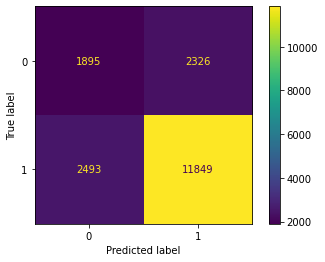

In [71]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(model,x_test,y_test)
plt.show(pl)

In [72]:
# Thx